In [131]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [155]:
x=sym.Symbol('x', real=True)
y=sym.Symbol('y', real=True)

In [156]:
z=x+sym.I*y

In [157]:
f= z**3-1
f

(x + I*y)**3 - 1

In [158]:
var=(x,y)

In [159]:
F=[sym.re(f), sym.im(f)]

In [161]:
J=[[sym.diff(F[0],x),sym.diff(F[0],y)],[sym.diff(F[1],x),sym.diff(F[1],y)]]
    
sym.Matrix(J)
    
    

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [68]:
Fn= sym.lambdify([x,y],F,'numpy')
Jn=sym.lambdify([x,y],Jacob,'numpy')

In [89]:
def newton_raphson(z0, Fn, Jn):
    zn = z0
    error = 1
    while error > 1e-7:
        
        
        zn1 = zn - np.linalg.inv(Jn(zn[0],zn[1])) @ Fn(zn[0],zn[1])
        error = np.linalg.norm(zn - zn1)
        
        
        zn=zn1
    return zn

In [90]:
z0=np.ones(2)-0.5
newton_raphson(z0,Fn,Jn)

array([-0.5      ,  0.8660254])

In [149]:
N=1000


In [150]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)


In [151]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
Fractal = np.zeros((N,N), np.int64)

roots = []
for i in range(N):
    for j in range(N):
        z0 = [x[i], y[j]]
        root = newton_raphson(z0, Fn, Jn)
        root = [round(root[0], 4), round(root[1], 4)]
        if root not in roots:
            roots.append(root)
        index = roots.index(root)
        if index == 0:
            Fractal[i,j] = 20
        elif index == 1:
            Fractal[i,j] = 100
        elif index == 2:
            Fractal[i,j] = 255

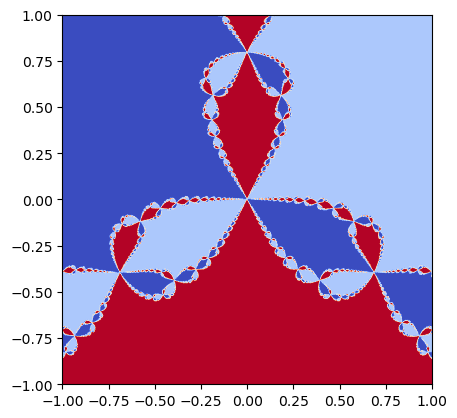

In [152]:
plt.imshow(Fractal, cmap='coolwarm', extent=[-1,1,-1,1])